In [98]:
### 통합된 파일 읽어들이기
# 데이터 프레임 변수명 : df

import pandas as pd

file_path = "./files2_tot/kto_total.xlsx"
df = pd.read_excel(file_path)
df.head(1)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%),전체관광객비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,96.96,50.603


In [99]:
### 데이터 프레임 정보 확인하기
# 결측 데이터 있는지 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   국적          6960 non-null   object 
 1   관광          6960 non-null   int64  
 2   상용          6960 non-null   int64  
 3   공용          6960 non-null   int64  
 4   유학/연수       6960 non-null   int64  
 5   기타          6960 non-null   int64  
 6   계           6960 non-null   int64  
 7   기준년월        6960 non-null   object 
 8   대륙          6960 non-null   object 
 9   관광객 비율(%)   6960 non-null   float64
 10  전체관광객비율(%)  6960 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 598.3+ KB


#### 데이터 시각화

In [100]:
### 시각화 라이브러리 정의
# - 파이썬에서 사용되는 기본 시각화 라이브러리
import matplotlib.pyplot as plt

# 한글처리
plt.rc("font", family="NanumGothic")

# 마이너스 기호 깨짐 처리
plt.rcParams["axes.unicode_minus"] = False

In [101]:
### 데이터 현황 분석
# - 관광객 입국 데이터를 이용해서 년도 및 월별로 입국객 변화 추이를 시각적 현황 분석
# - 계절적 이슈(특이한 패턴 찾기)가 있는지 확인
# - 이슈에 대한 해석으로 마무리

In [102]:
### 중국 국적에 대한 데이터만 필터링
# 사용 컬럼 : 전체
# - 변수명 : df_fillter

c = df["국적"] == '중국'
df_fillter = df[c]

df_fillter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%),전체관광객비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.300,10.086
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.103,13.569
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.580,9.227
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.050,15.508
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.804,16.952
...,...,...,...,...,...,...,...,...,...,...,...
6677,중국,410542,3575,362,9959,68812,493250,2019-04,아시아,83.232,29.695
6737,중국,413949,4034,534,14003,67893,500413,2019-05,아시아,82.721,33.557
6797,중국,395196,3743,399,14680,60989,475007,2019-06,아시아,83.198,31.926
6857,중국,439699,3587,356,10847,64643,519132,2019-07,아시아,84.699,36.077


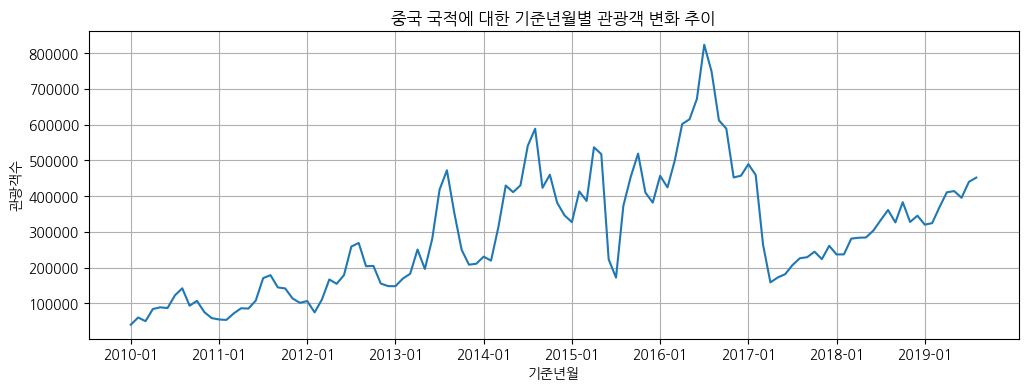

In [103]:
### 기준년월별 중국 관광객 변화 추이 시각화

# 선 그래프 사용
# plot(x축 값, y축 값) 함수 사용

### 그래프 전체 크기 조정 : figsize(너비, 높이)
plt.figure(figsize=(12, 4))

### 그래프 제목 넣기 : title()
# 한글을 사용하는 경우 한글 처리가 위에 되어 있어야 가능
plt.title("중국 국적에 대한 기준년월별 관광객 변화 추이")

### 선 그래프 그리기
plt.plot(df_fillter["기준년월"], df_fillter["관광"])

### x축 y축 이름 넣기
plt.xlabel("기준년월")
plt.ylabel("관광객수")

### x축 구간에 대한 값의 범위를 재정의
# 리스트 타입으로 넣어야 함
xList = ["2010-01", "2011-01", "2012-01", "2013-01", "2014-01", 
         "2015-01", "2016-01", "2017-01", "2018-01", "2019-01"]
plt.xticks(xList)

### 모눈선 그리기
plt.grid()

# 그래프 출력
plt.show()

#### 그래프 해석
- 전체적으로 매년 점진적 관광객 증가하는 추이를 보임
- 계절성 여름 기간에 관광객 급속 증가

#### 특이점
- 2015년 중순 하락 이후 16년도에 정상적으로 회복 되었으나 17년 초순의 경우 하락 이후 회복되지 않고 있음

#### 특이점 원인 분석
- 2015년 경우 아시아 지역에 대한 메르스로 인한 일시적 현상 나타남
- 2017년도 초순은 한국의 사드 미국 군사무기 배치에 따른 정치적 현상으로 보임

#### 마무리
- 관광의 경우 전염병 및 정치적 현상의 영향을 매우 크게 받는 것으로 보임
- 향후 관광산업 분석 시 이러한 점을 고려하여 추가 분석 가능함

#### 우리나라에 방문하는 외국인 관광객이 가장 많은 국가 Top5 조회

- 각 국적별로 집계(그룹)한 후 > 집계 된 전체 관광객 비율의 값을 평균
- 평균이 가장 높은 순으로 정렬하고 Top5 데이터만 추출함

In [104]:
temp= df.pivot_table(
    # 집계할 기준[컬럼명] 정의
    index="국적",
    # 집계에 사용할 데이터 [컬럼명] 정의
    values="전체관광객비율(%)",
    # 그룹을 대표하는 데이터값은 평균을 사용
    aggfunc="mean"
)

# 타입 확인
type(temp)

# 정렬하기
# 오름차순 : 낮은값 부터 높은값 (ascending, ASC)
# 내림차순 : 높은값 부터 낮은값 (descending, DESC)
temp = temp.sort_values("전체관광객비율(%)", ascending=False)

### Top5 데이터만 추출하기
temp = temp.head(5)
temp

,전체관광객비율(%)
국적,
중국,32.114224
일본,28.352414
대만,6.648276
미국,6.035784
홍콩,4.646483


In [105]:
### 행 인덱스 값(보이는 인덱스 값)을 컬럼으로 사용하기
# - 인덱스를 컬럼으로 변경하기

## 처리한 데이터프레임의 결과를 변수에 담지않고 직접 메모리에 저장시키는 방법
# - inplace=True를 파라미터로 정의
temp.reset_index(inplace=True)

In [106]:
temp["국적"]

0    중국
1    일본
2    대만
3    미국
4    홍콩
Name: 국적, dtype: object

#### 외국인 관광객이 가장 많은 국가 Top5 대해 각각 관광객 추이 시각화

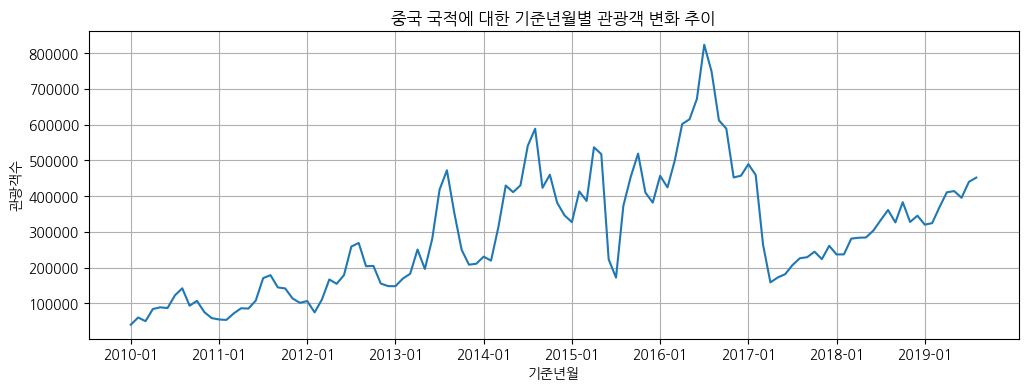

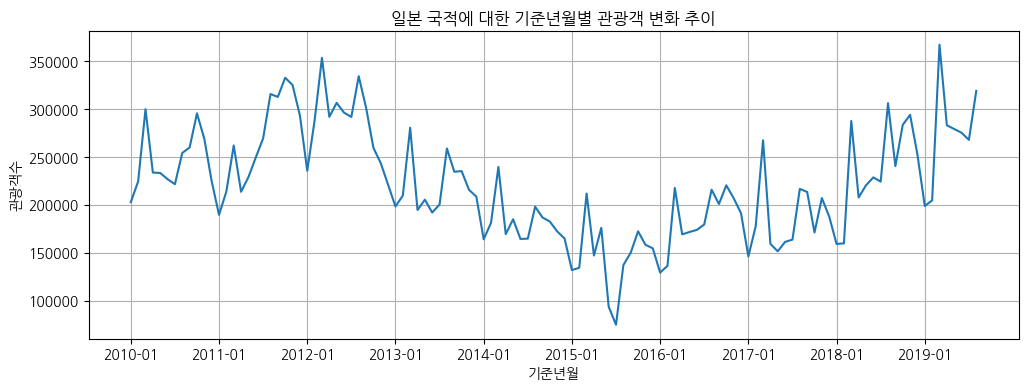

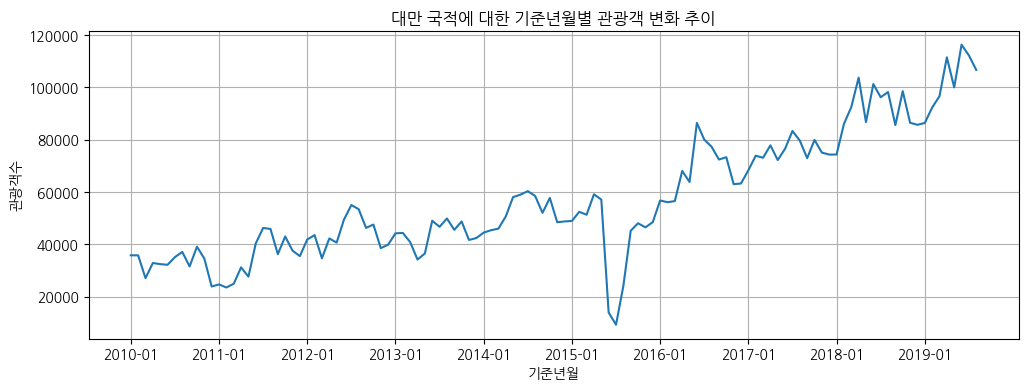

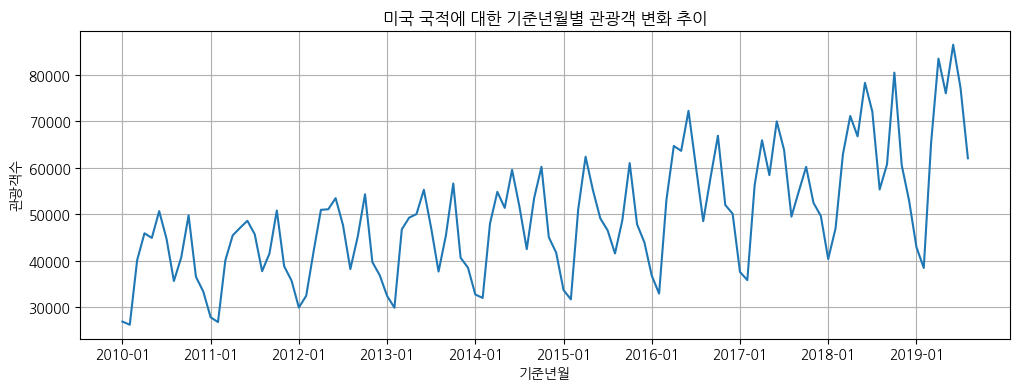

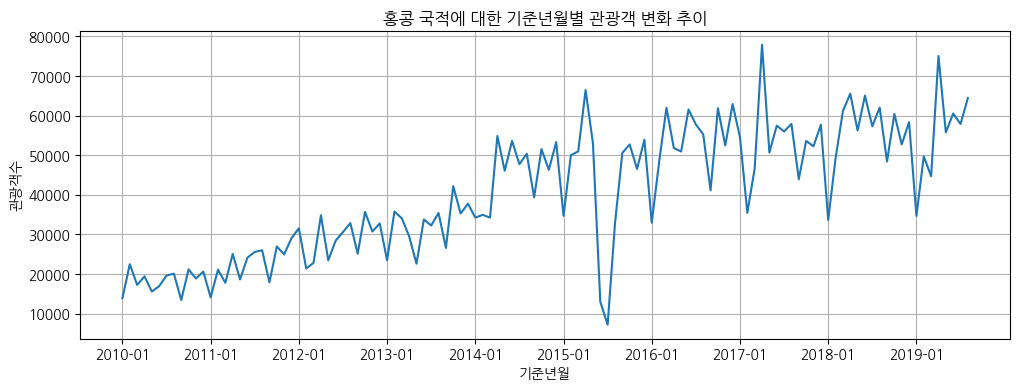

In [107]:
for nm in temp["국적"] :
    # print(nm)
    ## 국적에 해당하는 데이터 필터링 하기
    c = df["국적"] == nm
    df_fillter = df[c]

    ### **[시각화 그리기]**

    ### 그래프 전체 크기 조정 : figsize(너비, 높이)
    plt.figure(figsize=(12, 4))

    # 한글을 사용하는 경우 한글 처리가 위에 되어 있어야 가능
    plt.title(f"{nm} 국적에 대한 기준년월별 관광객 변화 추이")

    ### 선 그래프 그리기
    plt.plot(df_fillter["기준년월"], df_fillter["관광"])

    ### x축 y축 이름 넣기
    plt.xlabel("기준년월")
    plt.ylabel("관광객수")

    ### x축 구간에 대한 값의 범위를 재정의
    # 리스트 타입으로 넣어야 함
    xList = ["2010-01", "2011-01", "2012-01", "2013-01", "2014-01", 
            "2015-01", "2016-01", "2017-01", "2018-01", "2019-01"]
    plt.xticks(xList)

    ### 모눈선 그리기
    plt.grid()

    # 그래프 출력
    plt.show()

#### 여러 그래프를 하나로 합치기

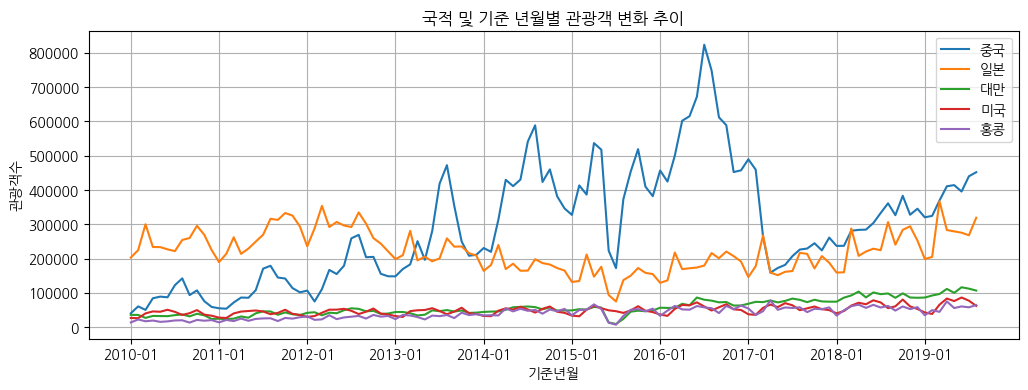

In [108]:
### **[시각화 그리기]**
### 그래프 전체 크기 조정 : figsize(너비, 높이)
plt.figure(figsize=(12, 4))

# 한글을 사용하는 경우 한글 처리가 위에 되어 있어야 가능
plt.title("국적 및 기준 년월별 관광객 변화 추이")

for nm in temp["국적"] :
    # print(nm)
    ## 국적에 해당하는 데이터 필터링 하기
    c = df["국적"] == nm
    df_fillter = df[c]

    ### 선 그래프 그리기
    plt.plot(df_fillter["기준년월"], df_fillter["관광"])

### x축 y축 이름 넣기
plt.xlabel("기준년월")
plt.ylabel("관광객수")

### x축 구간에 대한 값의 범위를 재정의 : 리스트 타입으로 넣어야 함
xList = ["2010-01", "2011-01", "2012-01", "2013-01", "2014-01", 
        "2015-01", "2016-01", "2017-01", "2018-01", "2019-01"]
plt.xticks(xList)

### 모눈선 그리기
plt.grid()

### 범례 표시하기 : legend()
# 리스트로 범례 목록 정의
plt.legend(temp["국적"])

# 그래프 출력
plt.show()

#### 히트맵 그래프 그리기

In [109]:
### 원본 데이터
df2 = df

# - copy()
# df의 메모리를 복제하여 새로운 메모리를 만들고 해당 주소를 받음
# df와 분리됨 (df의 메모리 주소를 바라보지 않음)

df2 = df.copy()
df2.head(1)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%),전체관광객비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,96.96,50.603


In [110]:
### 히트맵에 사용할 데이터

# x 축 : "기준년월" 데이터에서 "월" 데이터 사용
# y 축 : "기준년월" 데이터에서 "년도" 데이터 사용
# - 시점 데이터 : "관광" 데이터
# - 대표값 : 평균 값으로 사용

### 히트맵 시각화 시 피벗 테이블로 집계하면 편함
# - 년도 및 월별로 관광 데이터 평균 집계하기 : 피벗 테이블 이용

In [111]:
### x축 및 y축에 들어갈 년도 및 월 데이터 생성
# y축 년도 데이터는 y_list 변수
# x축 월 데이터는 x_list 변수

df2["기준년월"][0][0:4], df2["기준년월"][0][5:7]
df2["기준년월"][1][0:4], df2["기준년월"][1][5:7]

### y축에 사용할 데이터를 담을 리스트 변수
y_list = []

### x축에 사용할 데이터를 담을 리스트 변수
x_list = []

### df2의 기준년도 컬럼 데이터에서 년도 및 월 데이터를 각각 추출
# - 각각의 리스트 변수에 추가하기

for date in df2["기준년월"] :
    year = date[0:4]  # 연도 추출
    month = date[5:7]  # 월 추출
    
    y_list.append(year)  # y_list에 연도 추가
    x_list.append(month)  # x_list에 월 추가

# 결과 출력
print("y_list :", y_list)
print("x_list :", x_list)

len(y_list), len(x_list)

y_list : ['2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010'

(6960, 6960)

In [112]:
### df2 데이터 프레임에 "년도" 및 "월" 컬럼 생성

df2["년도"] = y_list
df2["월"] = x_list

df2.head(1)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%),전체관광객비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,96.96,50.603,2010,01


In [113]:
### 기준년월 컬럼의 데이터를 이용해서 한번에 처리
# - 년도 컬럼 생성 후 년도 데이터 추가
# - 월 컬럼 생성 후 월 데이터 추가

df2["년도"] = df2["기준년월"].str.slice(0, 4)
df2["월"] = df2["기준년월"].str.slice(5, 7)

df2.head(2)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%),전체관광객비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,96.960,50.603,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.321,8.929,2010,01


In [114]:
### 샘플링

c = df2["국적"] == "중국"
df_fillter = df2[c]
df_fillter.head(1)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%),전체관광객비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.086,2010,01


In [115]:
### 피벗 테이블로 집계하기 : 히트맵에 표시할 데이터 형태로 나타내기에 좋음

df_pivot = df_fillter.pivot_table(
    # y축 데이터
    index="년도",
    # x축 데이터
    columns="월",
    # 집계할 데이터(시점 데이터)
    values="관광",
    # 집계 방법(집계 함수)
    aggfunc="mean"
)

df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


#### 히트맵 시각화 하기

In [116]:
### 시각화 라이브러리 정의
# - 파이썬에서 사용되는 기본 시각화 라이브러리
import matplotlib.pyplot as plt

# - 히트맵 라이브러리
import seaborn as sns

# - 한글처리
plt.rc("font", family="NanumGothic")

# 마이너스 기호 깨짐 처리
plt.rcParams["axes.unicode_minus"] = False 

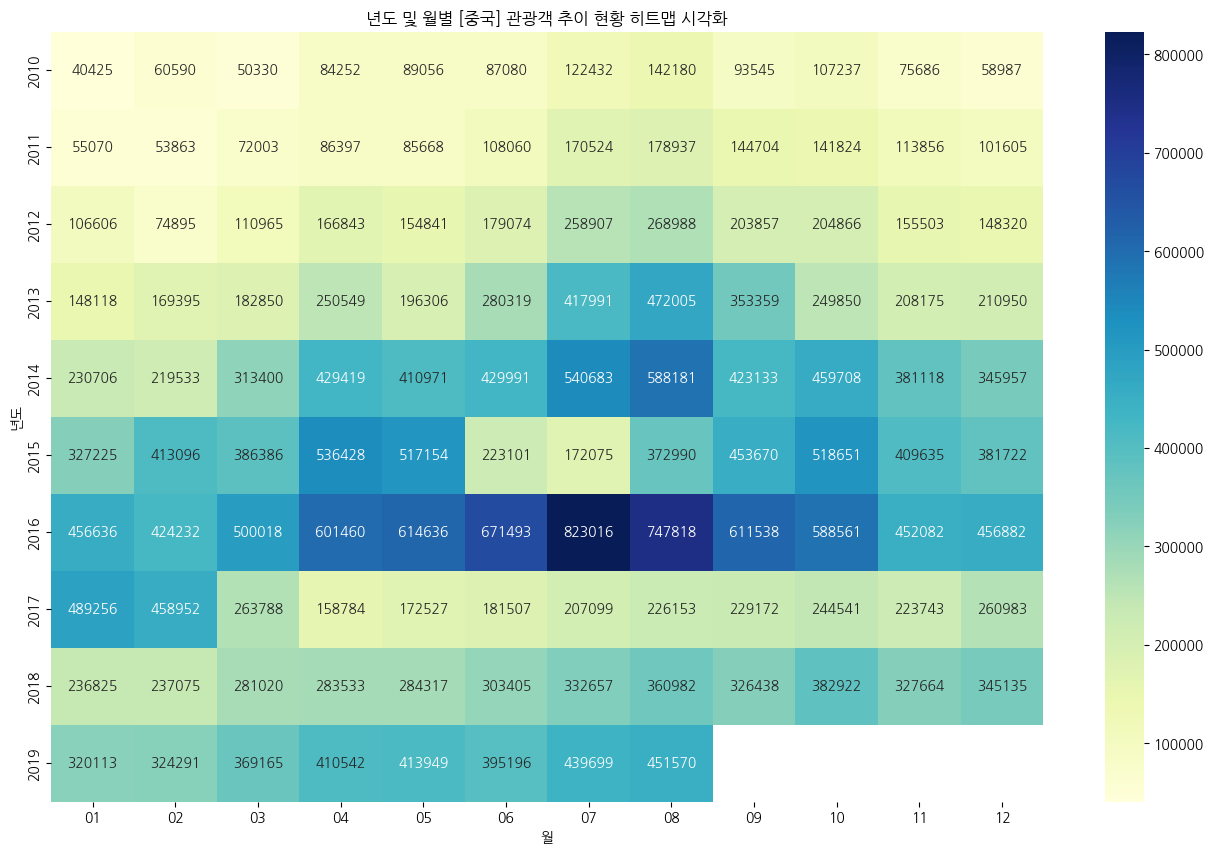

In [117]:
### 히트맵 그리기

# - 그래프 사이즈
plt.figure(figsize=(16, 10))

# - 그래프 제목
plt.title("년도 및 월별 [중국] 관광객 추이 현황 히트맵 시각화")

# - 히트맵 그래프 그리기
# - annot : 시점 데이터 값을 보여줄지(True), 말지(False) 정의
# - fmt : 실수형 데이터의 소숫점 자릿수 결정 : .0f는 소숫점 밑으로 사용 안함
# - camp : 색상맵이라고 칭함(매우 많은 색상맵이 있음. 찾아서 사용)
sns.heatmap(df_pivot, annot=True, fmt=".0f", cmap="YlGnBu")

# - 그래프 보여주고, 메모리 비우기
plt.show()

#### 외국인 관광객이 가장 많은 Top5 국가에 대해서 각각 히트맵 그리기

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15044\1332540287.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fillter["년도"] = df_fillter["기준년월"].str.slice(0, 4)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15044\1332540287.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fillter["월"] = df_fillter["기준년월"].str.slice(5, 7)


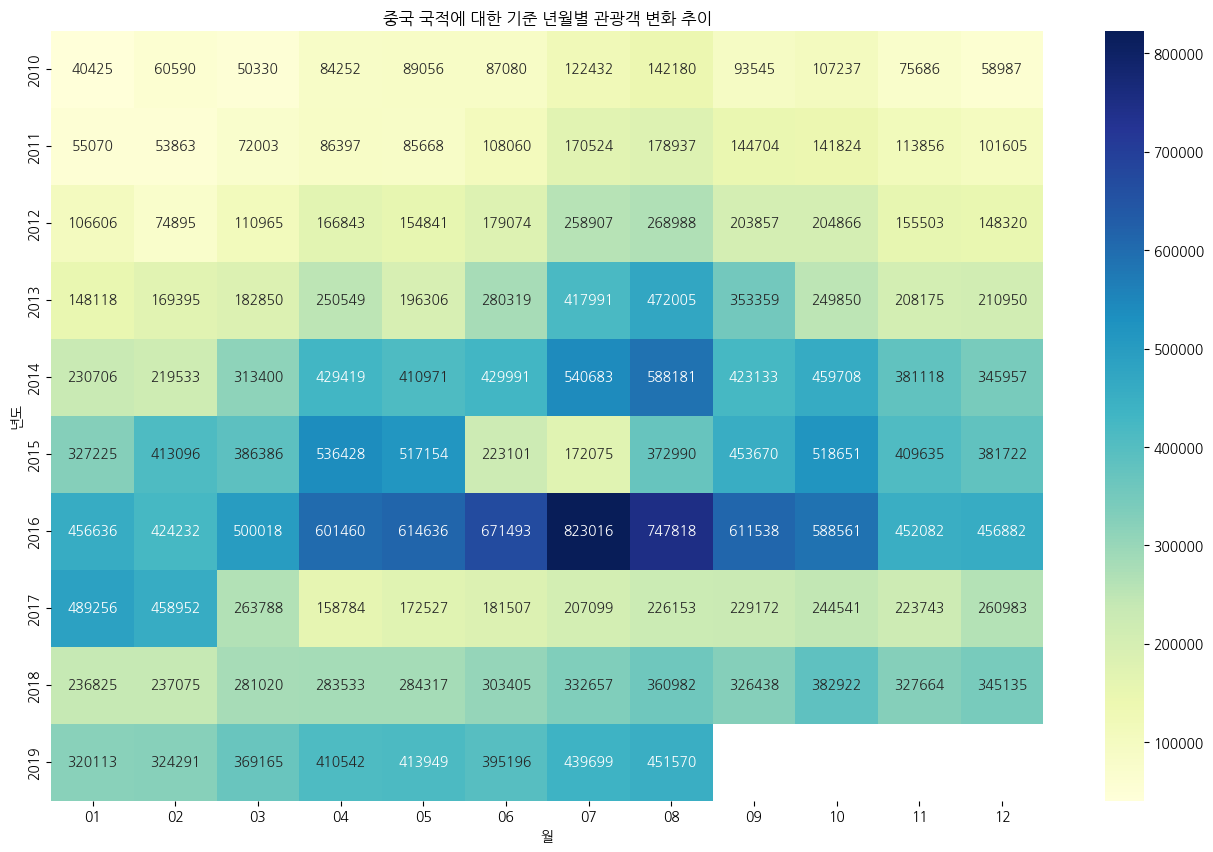

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15044\1332540287.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fillter["년도"] = df_fillter["기준년월"].str.slice(0, 4)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15044\1332540287.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fillter["월"] = df_fillter["기준년월"].str.slice(5, 7)


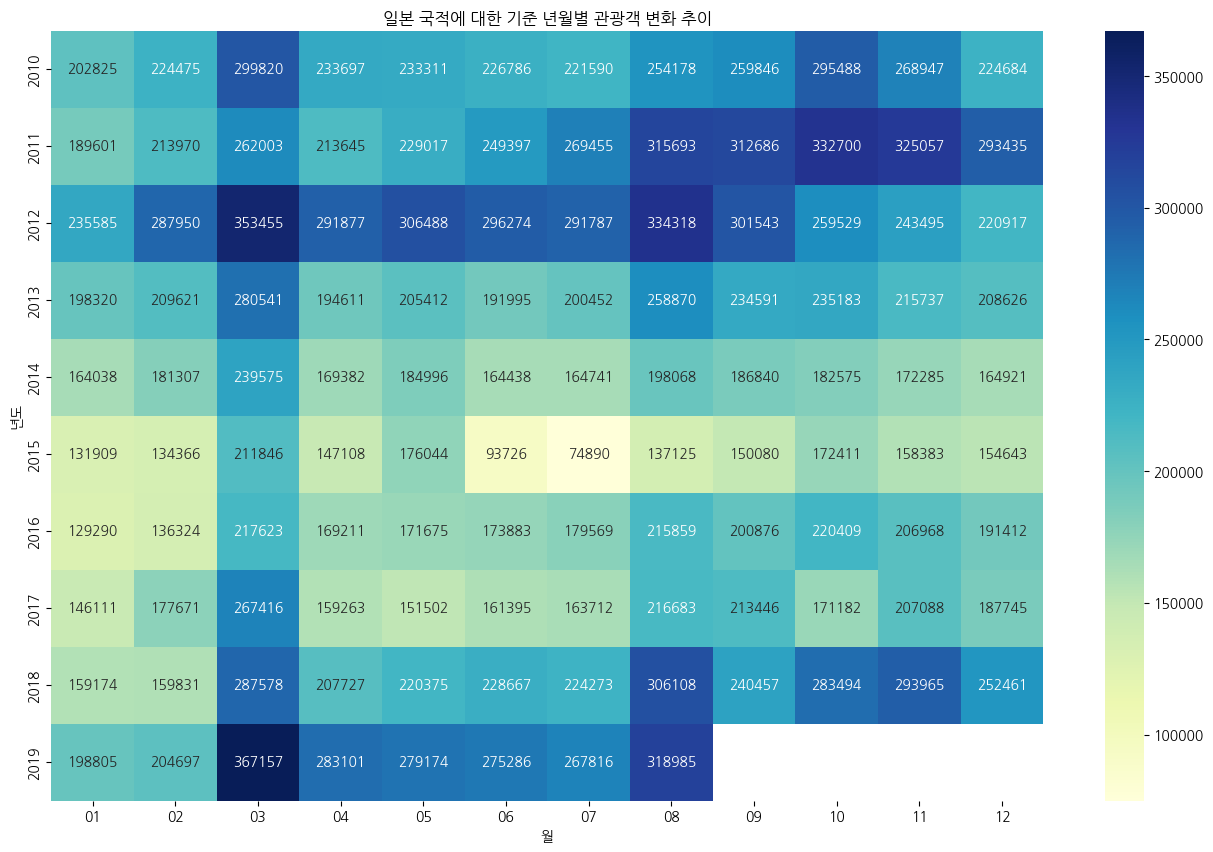

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15044\1332540287.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fillter["년도"] = df_fillter["기준년월"].str.slice(0, 4)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15044\1332540287.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fillter["월"] = df_fillter["기준년월"].str.slice(5, 7)


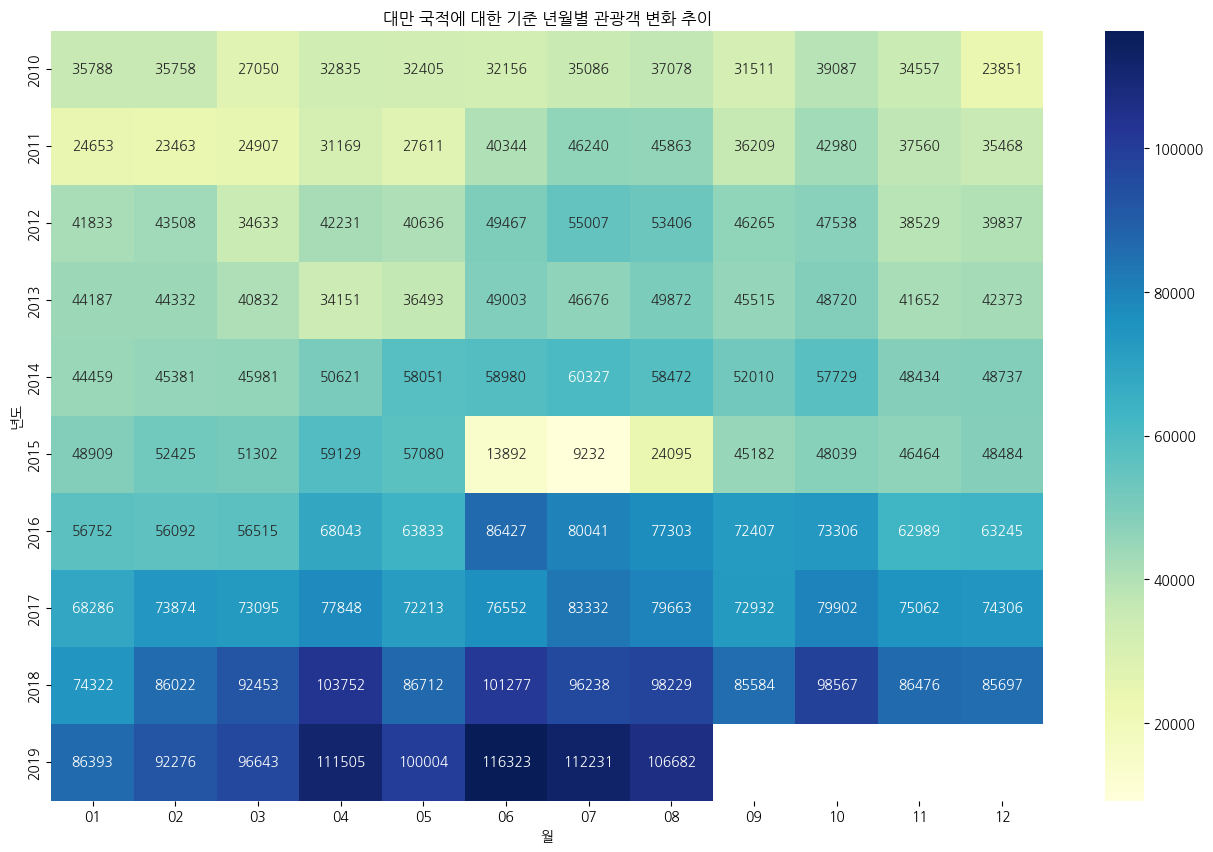

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15044\1332540287.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fillter["년도"] = df_fillter["기준년월"].str.slice(0, 4)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15044\1332540287.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fillter["월"] = df_fillter["기준년월"].str.slice(5, 7)


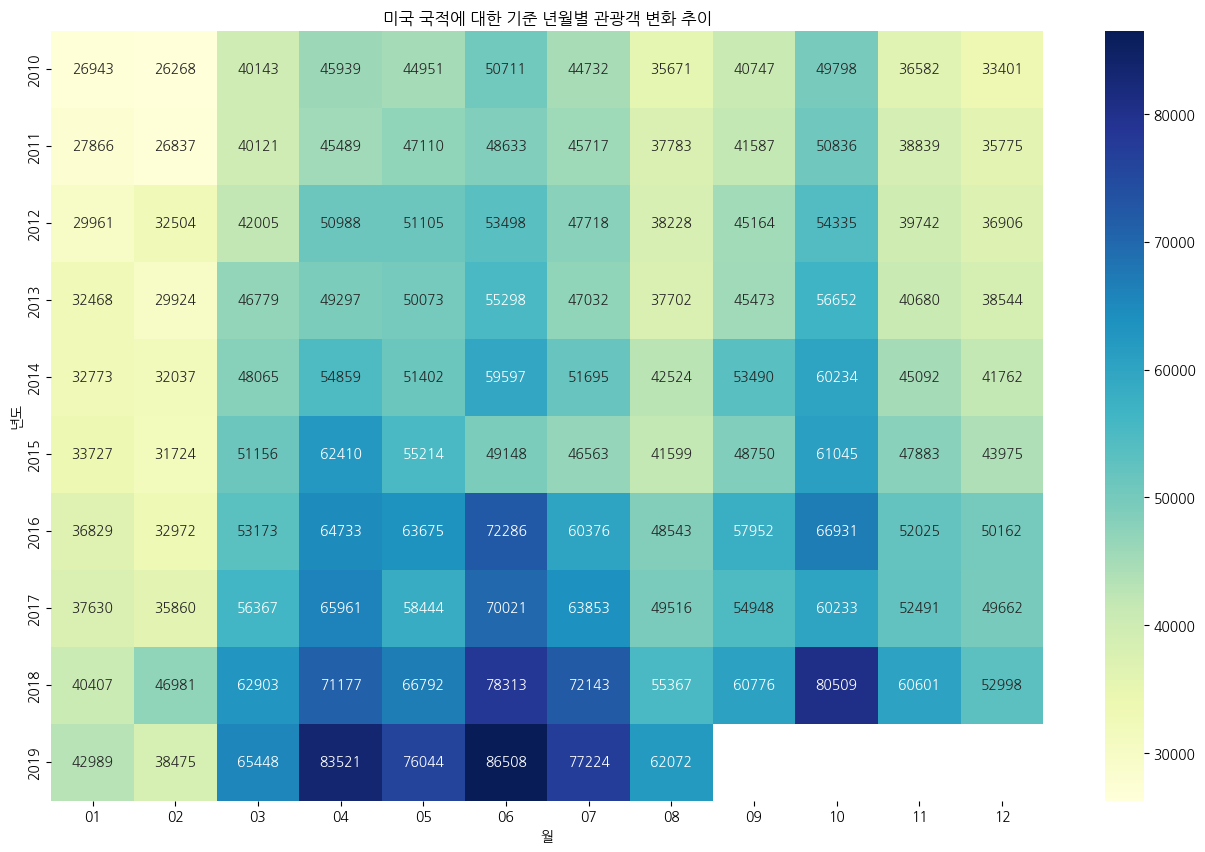

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15044\1332540287.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fillter["년도"] = df_fillter["기준년월"].str.slice(0, 4)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15044\1332540287.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fillter["월"] = df_fillter["기준년월"].str.slice(5, 7)


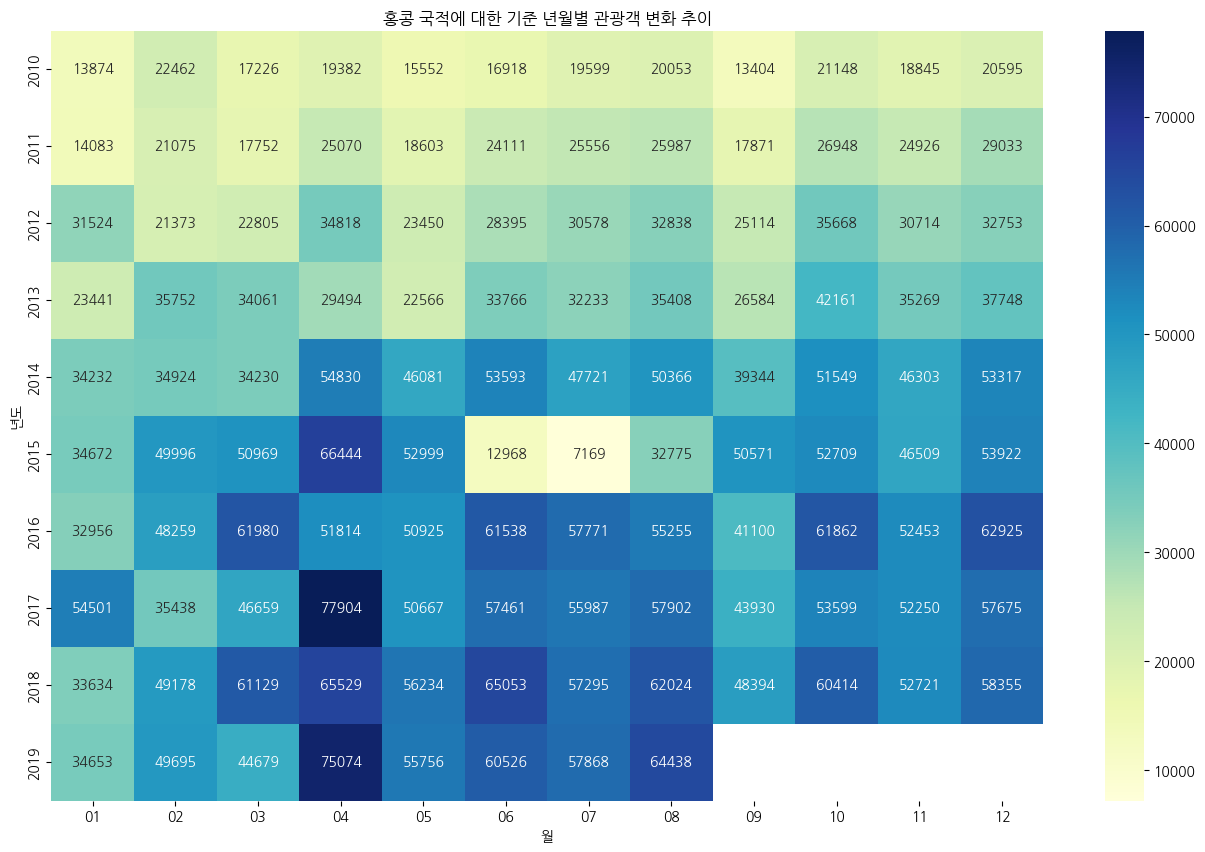

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

for nm in temp["국적"]:
    ## 국적에 해당하는 데이터 필터링 하기
    c = df2["국적"] == nm
    df_fillter = df2[c]

    ### **[시각화 그리기]**
    plt.figure(figsize=(16, 10))
    plt.title(f"{nm} 국적에 대한 기준 년월별 관광객 변화 추이")

    ### df_fillter에서 기준년월 컬럼을 이용하여 년도와 월 추출
    df_fillter["년도"] = df_fillter["기준년월"].str.slice(0, 4)
    df_fillter["월"] = df_fillter["기준년월"].str.slice(5, 7)

    # 피벗 테이블 생성 (년도, 월별로 관광객 수의 평균 계산)
    df_pivot = df_fillter.pivot_table(
        index="년도",          # y축: 연도
        columns="월",          # x축: 월
        values="관광",         # 집계할 값: 관광객 수
        aggfunc="mean",        # 집계 방법: 평균
    )

    ### 히트맵 그래프 그리기
    sns.heatmap(df_pivot, annot=True, fmt=".0f", cmap="YlGnBu", cbar=True)

    # 그래프 출력
    plt.show()
